In [1]:
import pandas as pd
import numpy as np
import json
import networkx as nx

In [2]:
try:
    input_args = json.loads(open('../input/simulation.json').read())
except Exception as ex:
    print('simulation.json does not exist!')
    print(ex)

In [14]:
# change the path for other waves of data - also adapt the bins of the histograms (the maximum values and ranges)
primary_school = '../data/Buzz_W5_primary-schools.csv'
secondary_school = '../data/Buzz_W5_secondary-schools.csv'

In [15]:
df_comm = pd.read_csv(primary_school, sep=';', header=0)
df_comm = df_comm.append(pd.read_csv(secondary_school, sep=';', header=0))
df_comm.shape

/Users/bojansimoski/anaconda3/envs/ABM-PA/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (22) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(174524, 30)

In [16]:
#surpress the scientific notation format that's shown by default
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [17]:
df_comm.Class.unique(),df_comm.Class.nunique()

(array([103.,  nan, 250., 251., 296., 297.,  82., 308., 135., 131., 133.,
        134., 100., 300., 301., 124., 298., 299., 303., 141., 125., 290.,
        291.,  73.,  74.,  81., 272., 273.,  78., 292.,  86., 261., 262.,
        263., 302., 279., 277., 256., 258., 259., 310., 304., 305., 306.,
        307.,  66.]),
 45)

###### comment out if you want to see only data from selected classes

In [18]:
df_comm = df_comm[df_comm.Class.isin(input_args["classes"])]
df_comm = df_comm[df_comm.Child.isin(input_args["participants"])]

In [19]:
df_comm['Child'].nunique(),df_comm['RecipientChild'].nunique()

(408, 460)

In [20]:
df_comm.columns

Index(['Participant', 'School', 'Class', 'Child', 'Gender', 'Age', 'PI',
       'Date', 'Time', 'UMID', 'Format_text', 'Format_Media', 'Type',
       'RecipientChild', 'ClassReceive', 'Content', 'Media', 'ReactionInto',
       'Flagged', 'PostedWhileBanned', 'ShareSource', 'SharedVia',
       'Number_likes', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25',
       'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29'],
      dtype='object')

In [21]:
df_comm.groupby(["Type"])['Type'].count()

Type
group      29731
my         26051
mymovez     1397
Name: Type, dtype: int64

In [22]:
df_comm_group = df_comm[df_comm.Type=="group"]
df_comm_group.shape

(29731, 30)

In [23]:
df_comm_ind = df_comm[df_comm.Type=="my"]
df_comm_ind.shape

(26051, 30)

In [24]:
df_comm.Participant.nunique(),df_comm.Child.nunique(),df_comm.RecipientChild.nunique()

(408, 408, 460)

In [25]:
df_comm = df_comm.astype({'Child': 'int32'})
df_comm = df_comm.astype({'Class': 'int32'})
df_comm = df_comm.astype({'Participant': 'float64'})



df_participants = df_comm.groupby(['Class','Participant','Child'])['UMID'].count().reset_index()
df_participants = df_participants[['Class','Participant','Child']]
df_participants['Participant'].nunique()

408

In [26]:
df_comm.Participant.dtype,df_comm.RecipientChild.dtype,

(dtype('float64'), dtype('float64'))

In [27]:
df_comm = df_comm.astype({'RecipientChild': 'string'})


df_comm['RecipientChild']

9502            <NA>
9503            <NA>
9504            <NA>
9505    5629600000.0
9506    5629600000.0
            ...     
7879    5425805075.0
7880    5425805075.0
7881    5425805075.0
7882    5425805075.0
7883    5425805075.0
Name: RecipientChild, Length: 57179, dtype: string

In [28]:
df_participants

,Class,Participant,Child
0,78,2807801633.00,1633
1,78,2807801636.00,1636
2,78,2807801637.00,1637
3,78,2807801639.00,1639
4,78,2807801640.00,1640
...,...,...,...
403,303,5830306085.00,6085
404,303,5830306086.00,6086
405,303,5830306088.00,6088
406,303,5830306089.00,6089


In [29]:
df_participants.dtypes

Class            int64
Participant    float64
Child            int64
dtype: object

In [31]:
df_participants['Participant'].dtype,df_comm['RecipientChild'].dtype

(dtype('float64'), StringDtype)

### Messages exchanged between individuals

In [96]:
text_per_class = df_comm_ind.groupby('Class')['UMID'].count().reset_index()
text_per_class

,Class,UMID
0,78.00,241
1,81.00,159
2,100.00,581
3,124.00,363
4,125.00,565
5,256.00,281
6,258.00,188
7,261.00,448
8,262.00,263
9,263.00,1013


In [95]:
text_per_class.describe()

,Class,UMID
count,21.00,21.00
mean,240.05,1240.52
std,81.55,1307.73
min,78.00,159.00
25%,256.00,363.00
50%,272.00,612.00
75%,298.00,2168.00
max,303.00,5301.00


In [55]:
df_comm_ind['Class'].nunique(),df_comm_ind['Child'].nunique(),df_comm_ind['RecipientChild'].nunique()

(21, 408, 439)

In [56]:
df_comm_ind.groupby(["Class"])["Child"].nunique()

Class
78.00     18
81.00     19
100.00    19
124.00    17
125.00    16
256.00    22
258.00    16
261.00    17
262.00    15
263.00    20
272.00    24
273.00    24
292.00    21
296.00    17
297.00    16
298.00    21
299.00    19
300.00    19
301.00    24
302.00    19
303.00    25
Name: Child, dtype: int64

In [57]:
df_messages_per_child = df_comm_ind.groupby("Child")["UMID"].count().reset_index()
df_messages_per_child

,Child,UMID
0,1605.00,5
1,1606.00,2
2,1607.00,10
3,1608.00,16
4,1609.00,1
...,...,...
403,6085.00,14
404,6086.00,13
405,6088.00,105
406,6089.00,24


In [58]:
df_messages_per_child['UMID'].describe()

count   408.00
mean     63.85
std     103.97
min       1.00
25%       9.00
50%      23.50
75%      69.50
max     789.00
Name: UMID, dtype: float64

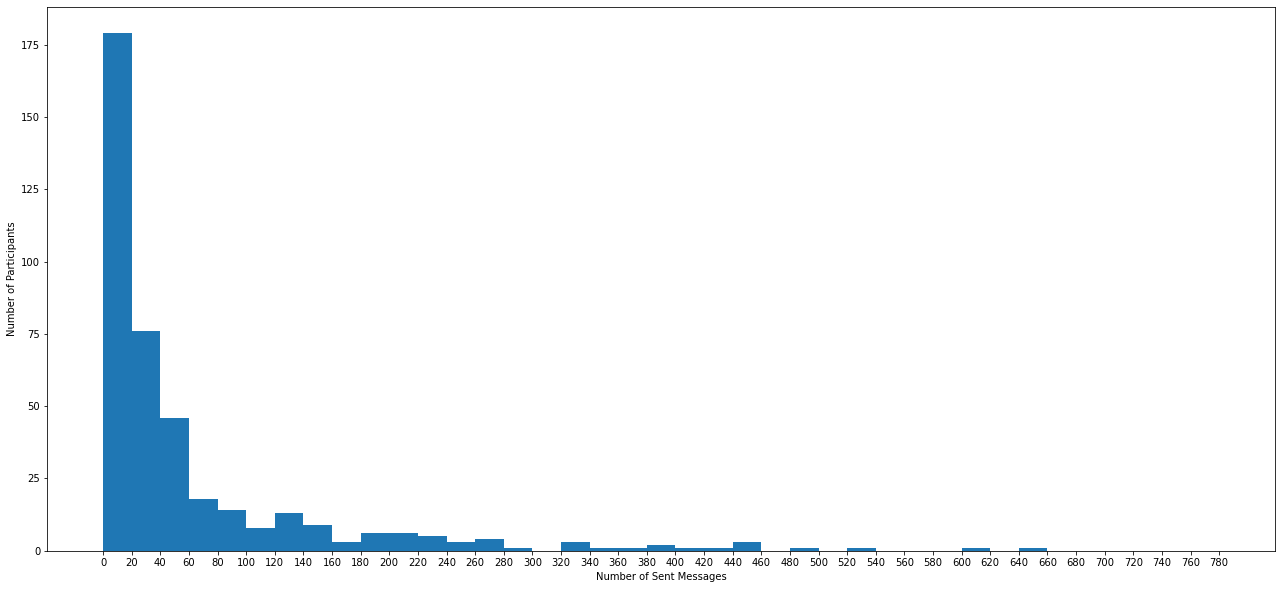

In [60]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(22, 10)
bins = range(0,790,20)
plt.xticks(bins)
df_comm_ind.groupby("Child")["UMID"].count().plot.hist(bins=bins)
ax.set_xlabel('Number of Sent Messages')
ax.set_ylabel('Number of Participants')
plt.show()

In [61]:
pairs_freq = df_comm_ind.groupby(["Participant","RecipientChild"])["UMID"].count().reset_index(name='NumberMessages')
pairs_freq

,Participant,RecipientChild,NumberMessages
0,2807801633,2807801641.00,1
1,2807801633,2807801644.00,2
2,2807801633,2807801645.00,3
3,2807801633,2807801649.00,1
4,2807801633,2807801655.00,3
...,...,...,...
3230,5830306089,5830306088.00,11
3231,5830306090,5830306063.00,3
3232,5830306090,5830306068.00,2
3233,5830306090,5830306077.00,3


In [62]:
pairs_freq = pairs_freq.astype({'Participant': 'float64'})

In [63]:
pairs = []
values = []
exchanged_messages = []
for line in pairs_freq[["Participant","RecipientChild", "NumberMessages"]].iterrows():
    (p1, p2, var) = line[1]
    if(p1, p2) not in pairs and (p2, p1) not in pairs:
        pairs.append((p1,p2))
        values.append((var))

    elif (p2, p1) in pairs:
        # get the index of this pair and update in the values of the same index
        ind = pairs.index((p2,p1))
        values[ind] = (values[ind] + var)

# print('found pairs',pairs)
# print('found values',values)


count = 0
for line in pairs:
    (pp1, pp2) = line
    exchanged_messages.append((pp1,pp2,values[count]))
    count = count + 1

exchanged_messages = pd.DataFrame(exchanged_messages, columns = ["P1", "P2", "NumMes"])
exchanged_messages

,P1,P2,NumMes
0,2807801633.00,2807801641.00,1.00
1,2807801633.00,2807801644.00,2.00
2,2807801633.00,2807801645.00,7.00
3,2807801633.00,2807801649.00,1.00
4,2807801633.00,2807801655.00,3.00
...,...,...,...
1968,5830306086.00,5830306062.00,4.00
1969,5830306086.00,5830306079.00,1.00
1970,5830306088.00,5830306060.00,2.00
1971,5830306088.00,5830306089.00,23.00


In [67]:
exchanged_messages['NumMes'].describe()

count   1973.00
mean      13.20
std       38.21
min        1.00
25%        2.00
50%        4.00
75%       10.00
max      637.00
Name: NumMes, dtype: float64

In [105]:
exchanged_messages.sort_values(by='NumMes',ascending=False).head(10)

,P1,P2,NumMes
1133,3829805962.00,3829805967.00,637.00
1920,5830306074.00,5830306076.00,466.00
1029,3829805951.00,3829805954.00,454.00
981,3829805945.00,3829805962.00,440.00
1925,5830306074.00,5830306081.00,425.00
1836,5830306063.00,5830306068.00,424.00
1022,3829805950.00,3829805959.00,346.00
1291,3829905941.00,3829905943.00,345.00
1643,5629605868.00,5629605874.00,299.00
96,2829205840.00,2829205842.00,295.00


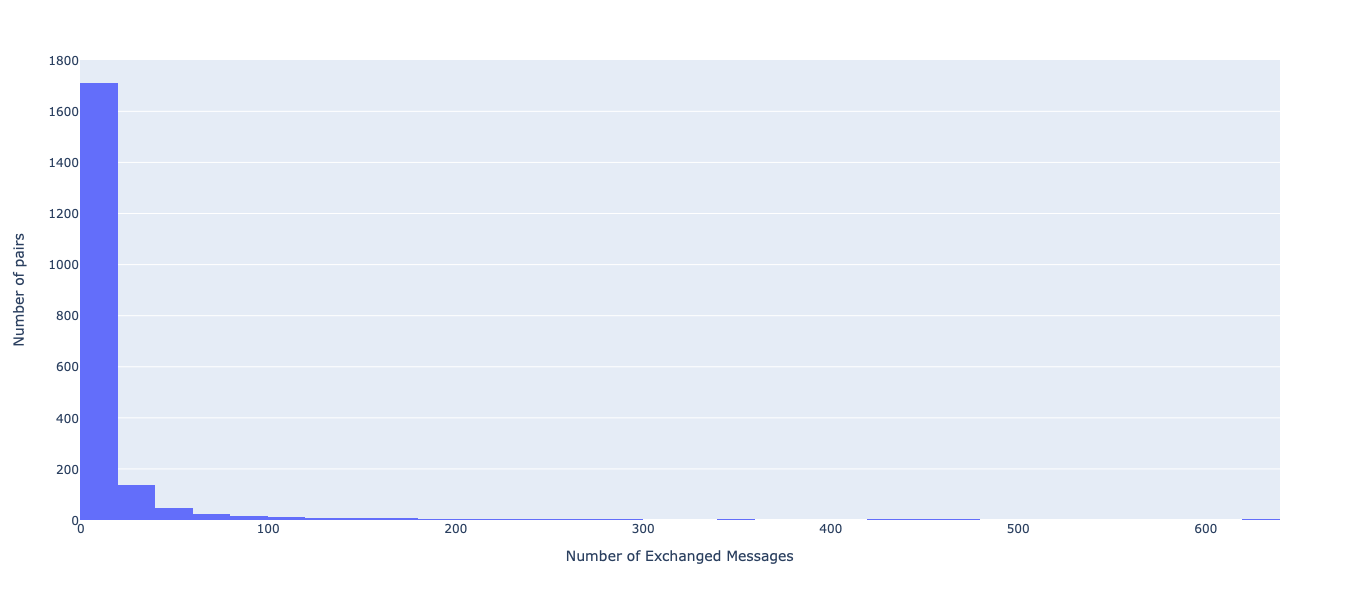

In [89]:
import plotly.express as px
df = exchanged_messages
fig = px.histogram(df, x="NumMes", nbins=32)
fig.update_layout(
    width=1000,
    height = 600,
    xaxis_title="Number of Exchanged Messages", yaxis_title="Number of pairs"
)
fig.show()

In [76]:
bins = range(0,640,20)
bins

range(0, 640, 20)

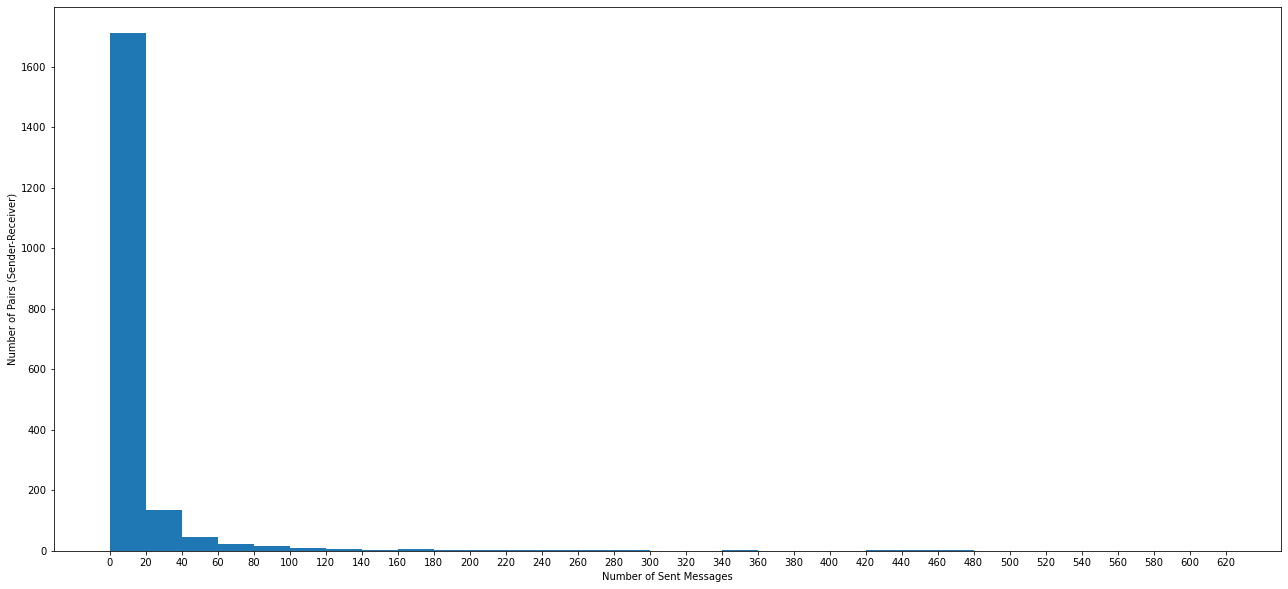

In [65]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(22, 10)
bins = range(0,640,20)
plt.xticks(bins)
exchanged_messages["NumMes"].plot.hist(bins=bins)
ax.set_xlabel('Number of Sent Messages')
ax.set_ylabel('Number of Pairs (Sender-Receiver)')
plt.show()

In [53]:
df_ind_images = df_comm_ind.groupby(["Participant","Format_Media"])["UMID"].count().reset_index(name = "NumberImages")
df_ind_images.head()

,Participant,Format_Media,NumberImages
0,2807801633,image,1
1,2807801633,video,5
2,2807801636,video,1
3,2807801637,image,2
4,2807801637,video,1


In [54]:
df_ind_images['NumberImages'].describe()

count   426.00
mean      5.84
std      10.07
min       1.00
25%       1.00
50%       2.00
75%       6.00
max     120.00
Name: NumberImages, dtype: float64

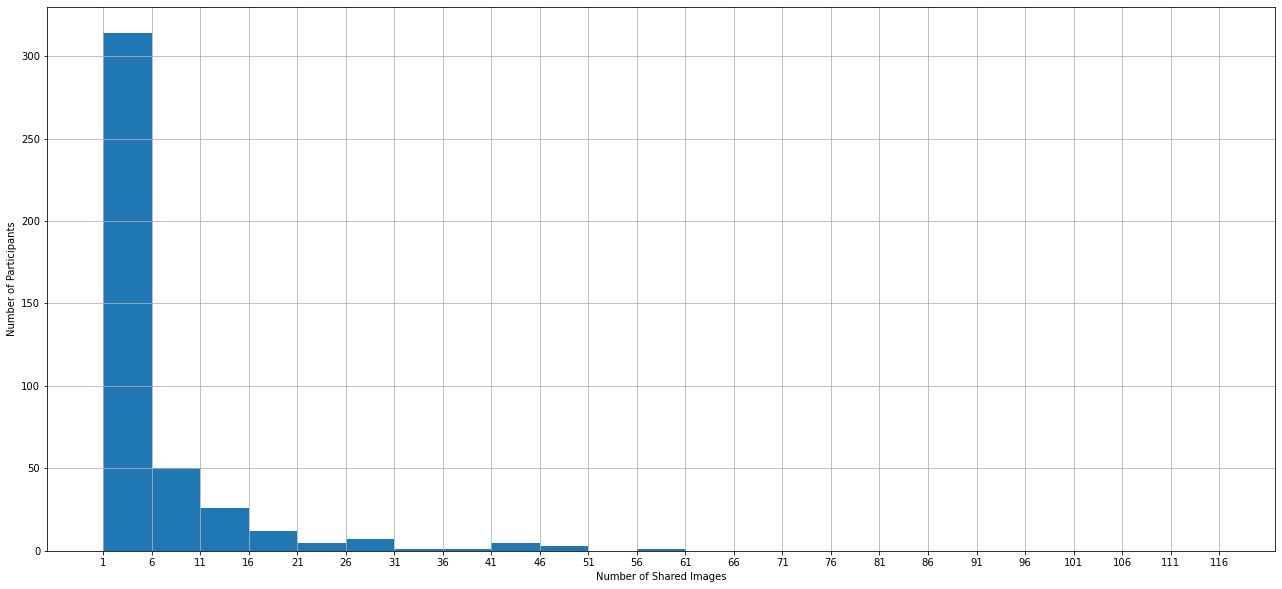

In [55]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(22, 10)
bins = range(1,120,5)
plt.xticks(bins)
df_ind_images['NumberImages'].hist(bins=bins)
ax.set_xlabel('Number of Shared Images')
ax.set_ylabel('Number of Participants')
plt.show()

In [56]:
df_comm_ind['Date'].unique()

array(['27-2-2018', '28-2-2018', '1-3-2018', '2-3-2018', '4-3-2018',
       '3-3-2018', '5-3-2018', '7-3-2018', '8-3-2018', '9-3-2018',
       '11-3-2018', '13-3-2018', '10-3-2018', '12-3-2018', '6-3-2018',
       '14-3-2018', '15-3-2018', '16-3-2018', '17-3-2018', '18-3-2018',
       '20-3-2018', '19-3-2018', '15-2-2018', '16-2-2018', '17-2-2018',
       '18-2-2018', '20-2-2018', '19-2-2018', '21-2-2018'], dtype=object)

In [57]:
df_comm_ind.groupby(['Date'])['UMID'].count().reset_index()

,Date,UMID
0,1-3-2018,1552
1,10-3-2018,565
2,11-3-2018,281
3,12-3-2018,251
4,13-3-2018,719
5,14-3-2018,559
6,15-2-2018,1241
7,15-3-2018,549
8,16-2-2018,1185
9,16-3-2018,618


### Group messages

In [58]:
df_comm_ind.groupby(["Class"])["Participant"].nunique()

Class
78.00     18
81.00     19
100.00    19
124.00    17
125.00    16
256.00    22
258.00    16
261.00    17
262.00    15
263.00    20
272.00    24
273.00    24
292.00    21
296.00    17
297.00    16
298.00    21
299.00    19
300.00    19
301.00    24
302.00    19
303.00    25
Name: Participant, dtype: int64

In [59]:
df_group_messages_per_child = df_comm_group.groupby("Child")["UMID"].count().reset_index()
df_group_messages_per_child.head()

,Child,UMID
0,1605.00,14
1,1606.00,3
2,1607.00,27
3,1608.00,2
4,1609.00,3


In [60]:
df_group_messages_per_child['UMID'].describe()

count   401.00
mean     74.14
std      90.68
min       1.00
25%      12.00
50%      36.00
75%     110.00
max     539.00
Name: UMID, dtype: float64

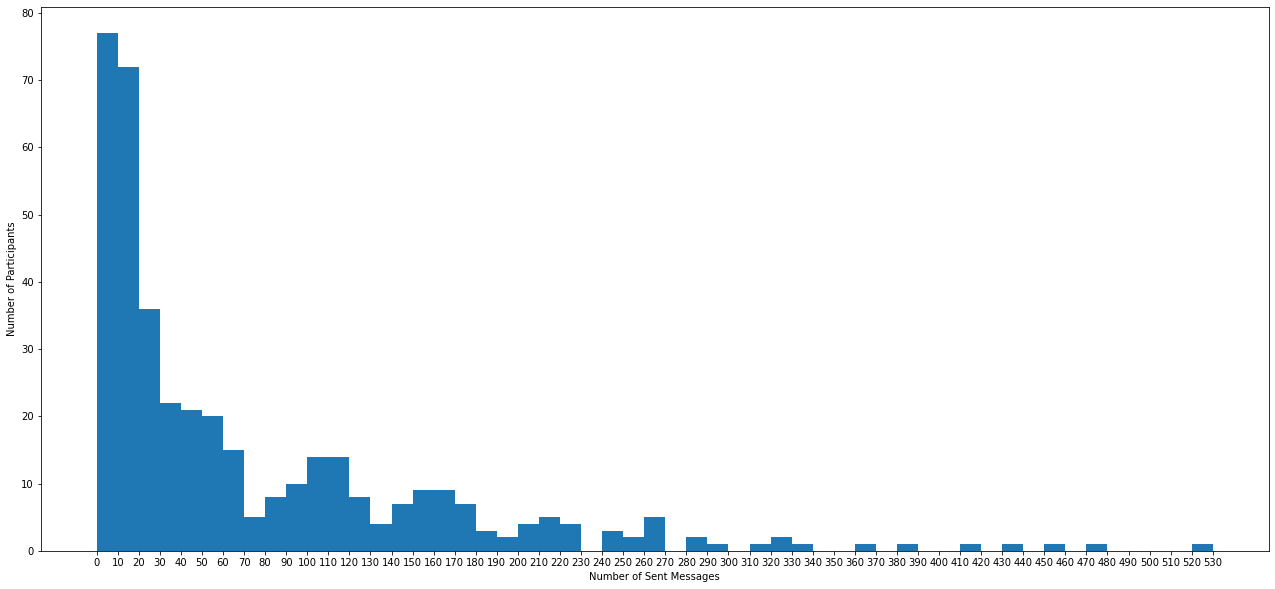

In [61]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(22, 10)
bins = range(0,540,10)
plt.xticks(bins)
df_group_messages_per_child['UMID'].plot.hist(bins=bins)
ax.set_xlabel('Number of Sent Messages')
ax.set_ylabel('Number of Participants')
plt.show()

In [62]:
df_comm_group = df_comm_group.astype({'Number_likes': 'int32'})

In [63]:
df_child_like = df_comm_group.groupby(['Child'])['Number_likes'].sum().reset_index()

In [64]:
df_child_like['Number_likes'].describe()

count   401.00
mean     12.44
std      16.19
min       0.00
25%       2.00
50%       8.00
75%      17.00
max     156.00
Name: Number_likes, dtype: float64

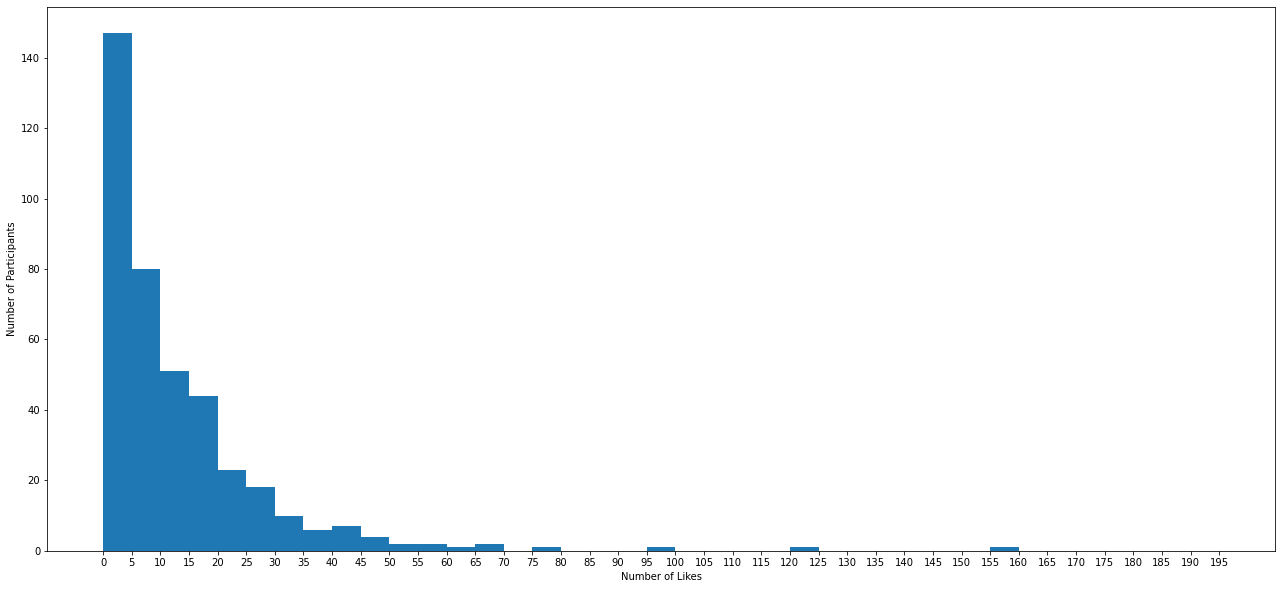

In [65]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(22, 10)
bins = range(0,200,5)
plt.xticks(bins)
df_child_like['Number_likes'].plot.hist(bins=bins)
ax.set_xlabel('Number of Likes')
ax.set_ylabel('Number of Participants')
plt.show()

In [66]:
# images exhanged in group vs peer-to-peer communication
df_comm_group['Format_Media'].count(),df_comm_ind['Format_Media'].count()

(3501, 2487)

In [67]:
df_group_images = df_comm_group.groupby(["Participant","Format_Media"])["UMID"].count().reset_index(name = "NumberImages")
df_group_images.head()

,Participant,Format_Media,NumberImages
0,2807801633,image,2
1,2807801636,image,1
2,2807801636,video,1
3,2807801637,image,1
4,2807801639,image,1


In [68]:
df_group_images['NumberImages'].describe()

count   556.00
mean      6.30
std       8.99
min       1.00
25%       2.00
50%       4.00
75%       7.00
max     126.00
Name: NumberImages, dtype: float64

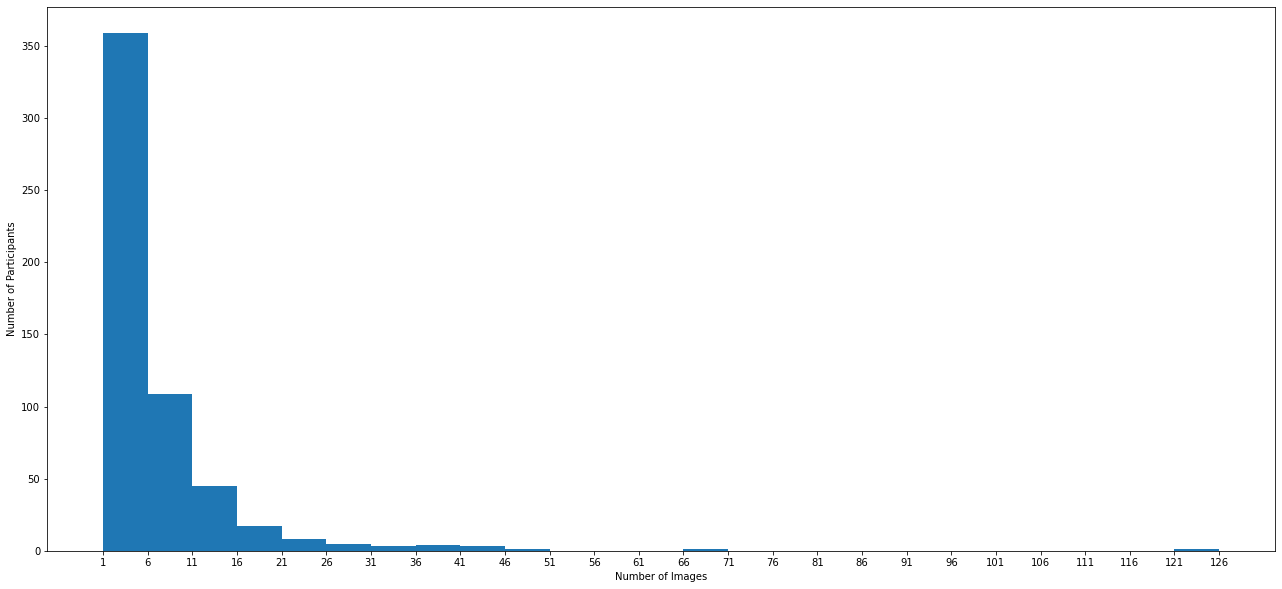

In [69]:

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(22, 10)
bins = range(1,130,5)
plt.xticks(bins)
df_group_images['NumberImages'].plot.hist(bins=bins)
ax.set_xlabel('Number of Images')
ax.set_ylabel('Number of Participants')
plt.show()